# Import all the necessary python libraries

In [2]:
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Imort the data

In [3]:
df = pd.read_csv('superstore_dataset.csv')

In [4]:
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


## Derive total sales and profit

In [6]:
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()

print(f"Total Sales: ${total_sales:.2f}")
print(f"Total Profit: ${total_profit:.2f}")

Total Sales: $2297200.86
Total Profit: $286397.02


## Top 10  most sell Products 

In [7]:
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
print("Top Products:\n", top_products)

Top Products:
 product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: sales, dtype: float64


### Sales in each Region

In [8]:
top_regions = df.groupby('region')['sales'].sum().sort_values(ascending=False)
print("Top Regions:\n", top_regions)

Top Regions:
 region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64


## Top 10 profitable products 

In [85]:
products = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
print("Top Products:\n", products)

Top Products:
 product_name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: profit, dtype: float64


### Profits from each region

In [87]:
regions = df.groupby('region')['profit'].sum().sort_values(ascending=False)
print("Top Regions:\n", regions)

Top Regions:
 region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: profit, dtype: float64


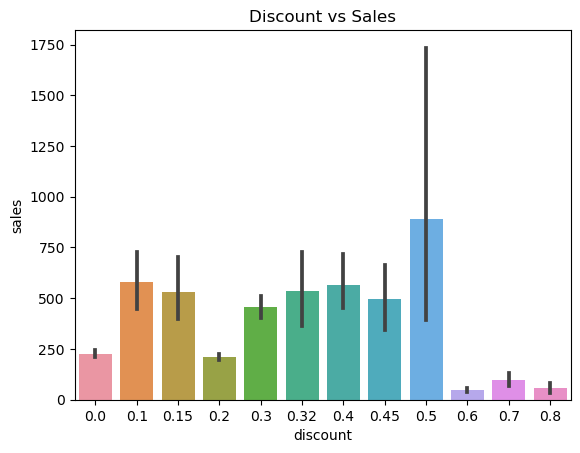

In [118]:
sns.barplot(x='discount', y='sales', data=df)
plt.title('Discount vs Sales')
plt.show()

## Profit margin by category

Average Profit Margin by Category:
 category
Furniture          0.038784
Office Supplies    0.138030
Technology         0.156138
Name: profit_margin, dtype: float64


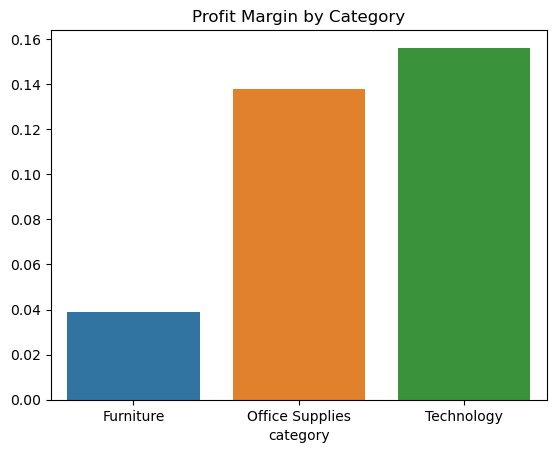

In [10]:
category_margin = df.groupby('category')['profit_margin'].mean()
print("Average Profit Margin by Category:\n", category_margin)

sns.barplot(x=category_margin.index, y=category_margin.values)
plt.title('Profit Margin by Category')
plt.show()

# Correlation Analysis

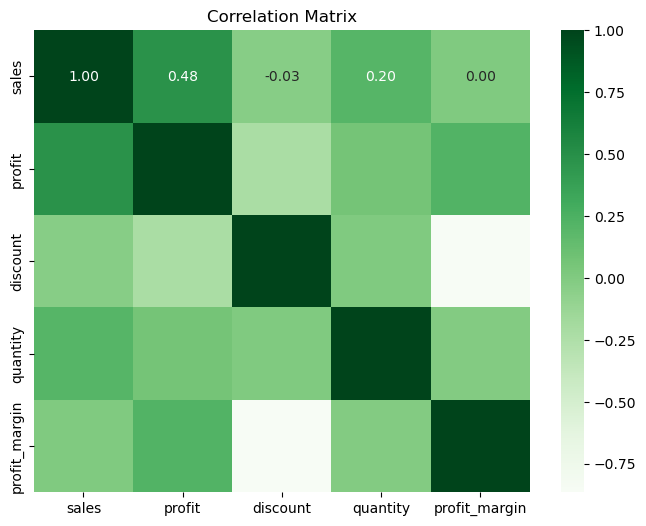

In [76]:
numerical_cols = ['sales', 'profit', 'discount', 'quantity', 'profit_margin']

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Copied the data into another dataframe 

In [12]:
ddf = df.copy()

###  Creating another column named ODT (Order Date in DateTime format) for set the column as time index

In [96]:
ddf['ODT'] = ddf['order_date']
ddf['ODT'] = pd.to_datetime(ddf['ODT'])

In [16]:
#Setting the ODT column as index
ddf.set_index('ODT', drop = True, inplace = True)

In [17]:
#Changing order_date inot datatime format
ddf['order_date'] = pd.to_datetime(ddf['order_date'])

## Plotting the monthly sales and forcasting the sales

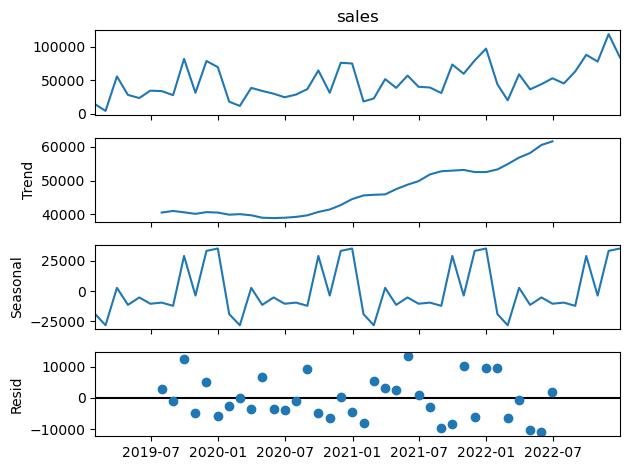

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


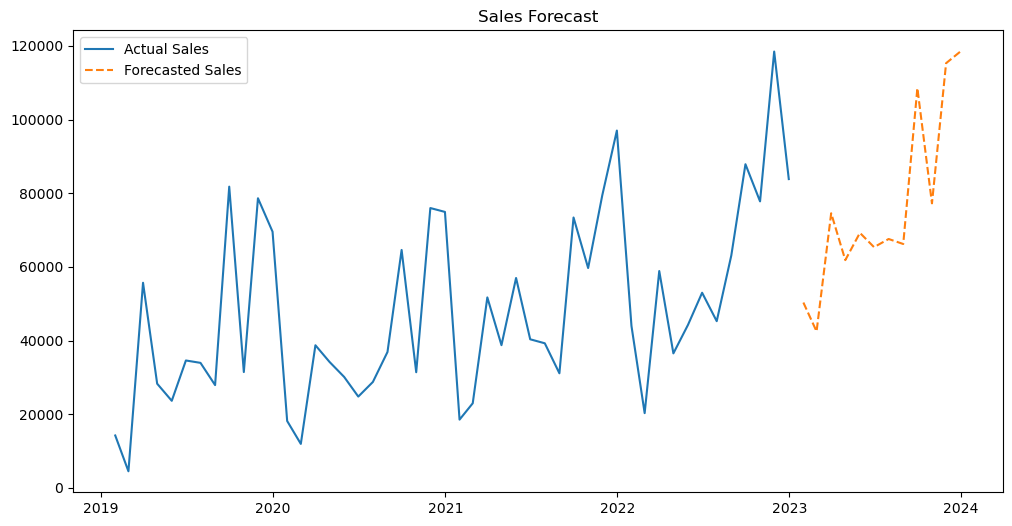

In [18]:
monthly_sales = ddf.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum()

# Decompose the time series
result = seasonal_decompose(monthly_sales, model='additive', period=12)
result.plot()
plt.show()

# Forecasting with Holt-Winters
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(12)

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales', linestyle='--')
plt.legend()
plt.title('Sales Forecast')
plt.show()

In [19]:
ddf['year_month'] = ddf['order_date'].dt.to_period('M')
monthly_sales = ddf.groupby('year_month')['sales'].sum().reset_index()

In [20]:
monthly_sales['sales_growth'] = monthly_sales['sales'].pct_change() * 100

In [136]:
monthly_sales.head(15)

,year_month,sales,sales_growth
0,2019-01,14236.8950,NaN
1,2019-02,4519.8920,-68.252263
2,2019-03,55691.0090,1132.131409
3,2019-04,28295.3450,-49.192257
4,2019-05,23648.2870,-16.423401
5,2019-06,34595.1276,46.290205
6,2019-07,33946.3930,-1.875220
7,2019-08,27909.4685,-17.783699
8,2019-09,81777.3508,193.009345
9,2019-10,31453.3930,-61.537770


In [22]:
#Setting the order_date as timeindex
df.set_index('order_date', drop = False, inplace = True)

## Performing Dicek_Fuller Test

In [72]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(df['sales'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['TEst Statistic' , 'p-value', '#lags Used', ' Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
TEst Statistic                   -98.890821
p-value                            0.000000
#lags Used                         0.000000
 Number of Observations Used    9993.000000
Critical Value (1%)               -3.431005
Critical Value (5%)               -2.861829
Critical Value (10%)              -2.566924
dtype: float64
